## Decision Tree Regressor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
## Creating a DataFrame
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target
## Taking Sample Data
df=df.sample(frac=0.25)

In [5]:
df.shape

(5160, 9)

In [6]:
## independent Features
X= df.iloc[:,:-1]
## Dependent Features
y= df.iloc[:,-1]

In [7]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10322,7.0592,16.0,7.434579,1.002336,1663.0,3.885514,33.87,-117.76
6867,3.1892,25.0,4.037037,1.026455,1304.0,3.449735,34.06,-118.12
6783,3.6406,39.0,3.932886,0.975391,892.0,1.995526,34.11,-118.17
12817,3.9143,8.0,5.306412,1.038475,7463.0,2.586828,38.62,-121.49
16200,1.8261,52.0,4.251613,0.993548,1368.0,4.412903,37.95,-121.27


In [8]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
## Applying Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()

In [10]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [11]:
y_pred=regressor.predict(X_test)

In [12]:
y_pred

array([1.594, 0.967, 3.048, ..., 2.195, 1.988, 0.759])

In [13]:
from sklearn.metrics import r2_score
score=r2_score(y_pred, y_test)

In [14]:
score

0.5093071846138555

In [15]:
## Hyperparameter Tunning
parameter={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'max_features':['auto','sqrt','log2']
}
regressor=DecisionTreeRegressor()

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv= GridSearchCV(regressor, param_grid=parameter, cv=2, scoring='neg_mean_squared_error')

In [17]:
regressorcv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [18]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [31]:
regressor=DecisionTreeRegressor(criterion='absolute_error', max_depth=7, max_features='auto', splitter='best')

In [32]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [33]:
%matplotlib inline

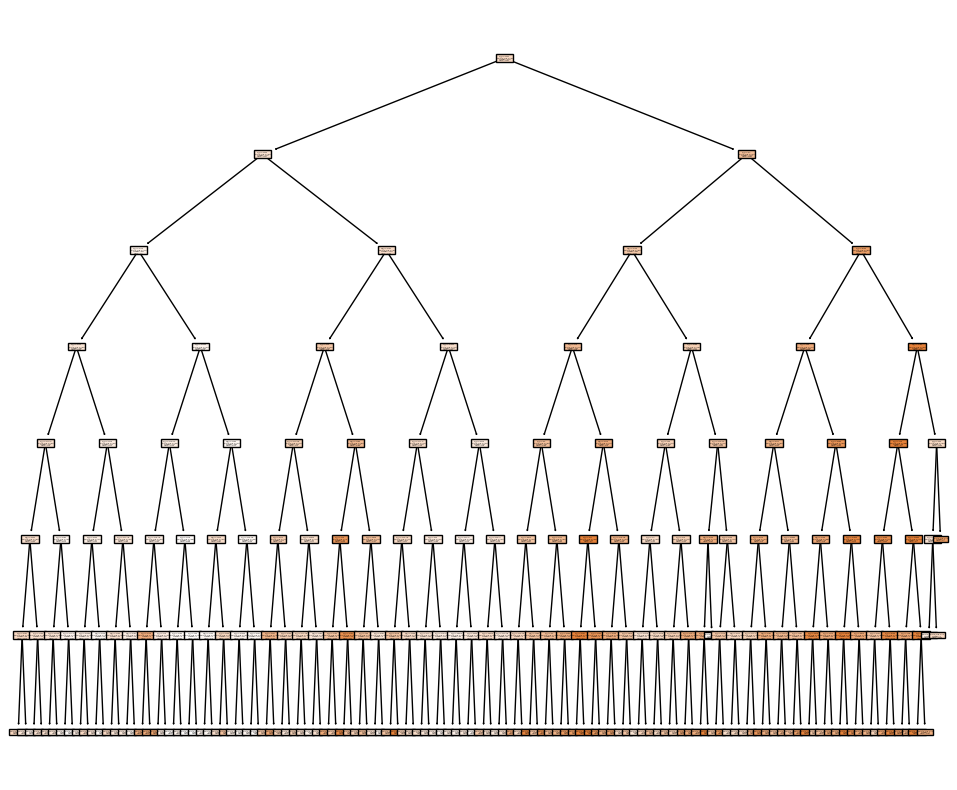

In [34]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor, filled=True)
plt.show()

In [35]:
y_pred=regressorcv.predict(X_test)

In [36]:
r2_score(y_pred,y_test)

0.4325581136060699